In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as img
import os
import glob
import shutil
import random
import pandas as pd
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
import itertools   

In [2]:
# Parameters
rim = 200 #resizing the image
val = 0.1 #10% of the training set data for the validation set
hu = 750 #hidden units
rel = 1

In [3]:
# Importing images from the training set (and the test set)

def importing(path):
    spl = []
    for filename in glob.glob(path):
        im = Image.open(filename,'r')
        im = im.resize((rim,rim))#resizing the image
        im = np.array(im)
        IM = im.ravel() # flattened array (1D)
        spl.append(IM)
    return spl

path1 = '/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/0/*.png'
path2 = '/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/1/*.png'
path3 = '/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/2/*.png'
path4 = '/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/3/*.png'
path5 = '/kaggle/input/knee-osteoarthritis-dataset-with-severity/train/4/*.png'

a1 = importing(path1) 
print("a1: size  = ", len(a1))

train_a = []

for i in a1:
    train_a.append(i)

h1 = importing(path2)
print("h1: size  = ", len(h1))


train_h = []

for i in h1:
    train_h.append(i)

b1 = importing(path3)
print("b1: size  = ", len(b1))


train_b = []

for i in b1:
    train_b.append(i)

c1 = importing(path4)
print("c1: size  = ", len(c1))


train_c = []

for i in c1:
    train_c.append(i)
d1 = importing(path5)
print("d1: size  = ", len(d1))


train_d = []

for i in d1:
    train_d.append(i)



a1: size  =  2286
h1: size  =  1046
b1: size  =  1516
c1: size  =  757
d1: size  =  173


In [4]:
dataframe_train_a = pd.DataFrame({'image':train_a, 'label': 'Healthy'})
dataframe_train_h = pd.DataFrame({'image':train_h, 'label': 'Doubtful'}) 
dataframe_train_b = pd.DataFrame({'image':train_b, 'label': 'Minimal'})
dataframe_train_c = pd.DataFrame({'image':train_c, 'label': 'Moderate'})
dataframe_train_d = pd.DataFrame({'image':train_d, 'label': 'Severe'}) 

data_train = dataframe_train_a.append(dataframe_train_h,ignore_index=True)
data_train1=data_train.append(dataframe_train_b,ignore_index=True)
data_train2=data_train1.append(dataframe_train_c,ignore_index=True)
data_train3=data_train2.append(dataframe_train_d,ignore_index=True)

In [5]:
trainX = []
for i in data_train3.image:
    trainX.append(i) 
    
traindX = np.array(trainX)

In [6]:
trainY = np.array(data_train3.label) 

traindY = []
for i in range(len(trainY)):
    if(trainY[i]=="Healthy"):
        traindY.append(0)
    elif(trainY[i]=="Doubtful") :
        traindY.append(1) 
    elif(trainY[i]=="Minimal") :
        traindY.append(2) 
    elif(trainY[i]=="Moderate") :
        traindY.append(3) 
    else:
        traindY.append(4) 
print(len(traindY))

classe = 5

trainY = np.zeros([len(traindY), classe])
for i in range(len(traindY)):
        trainY[i][traindY[i]] = 1

5778


In [7]:

trainX, validX, trainY, validY = train_test_split(traindX, trainY, test_size=val)
print('Training size: {training}, Validation size: {validation}'.format(training=len(trainX), validation=len(validX)))

Training size: 5200, Validation size: 578


In [8]:

trainX=np.matrix(trainX)
trainY=np.matrix(trainY)

validX=np.matrix(validX)
validY=np.matrix(validY)


In [9]:
# Extreme Learning Machine model
inputL = trainX.shape[1] #input length
HiddenUnits = hu #Hidden units
Wi = np.random.normal(size=[inputL, HiddenUnits]) #Gaussian random noise
Wi = np.matrix(Wi) #Hidden layer input weight matrix

print('Input weight shape: {shape}'.format(shape=Wi.shape))

Input weight shape: (40000, 750)


In [10]:
def input_hidden(x):
    print("x shape:",x.shape)
    print("Weights shape:",Wi.shape)
    
    m = np.dot(x, Wi) 
    m = np.maximum(m, rel, m) 
    return m

In [11]:
X = input_hidden(trainX) 
X_tr = np.transpose(X)
ww = np.dot(X_tr, X) 
c = np.identity(len(np.array(ww)))
c = np.dot(c,3)
ww = ww + c
wo_1 = np.linalg.inv(ww) 

wo_2 = np.dot(X_tr, trainY) 

Wo = np.dot(wo_1, wo_2) 
print('Output weights shape: {shape}'.format(shape=Wo.shape))

x shape: (5200, 40000)
Weights shape: (40000, 750)
Output weights shape: (750, 5)


In [12]:
def pred(x):
    x = input_hidden(x)
    y = np.dot(x, Wo)
    return y

In [30]:

accuracy_ =  []
specificty_ = []
sensibility = []


TP = 0 
TN = 0 
FP = 0 
FN = 0 

y = pred(validX)
correct = 0
total = y.shape[0]
prediction = []
valid = []
for i in range(total):
    prediction.append(np.argmax(y[i]))
    valid.append(np.argmax(validY[i]))

x shape: (578, 40000)
Weights shape: (40000, 750)


In [20]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 7), text_size=10, norm=False, savefig=False): 
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) 
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    plt.xticks(rotation=90, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    if savefig:
        fig.savefig("confusion_matrix.png")

In [21]:
labels={0:'Healthy',1:'Doubtful',2:'Minimal',3:'Moderate',4:'Severe'}

In [27]:
valid

1

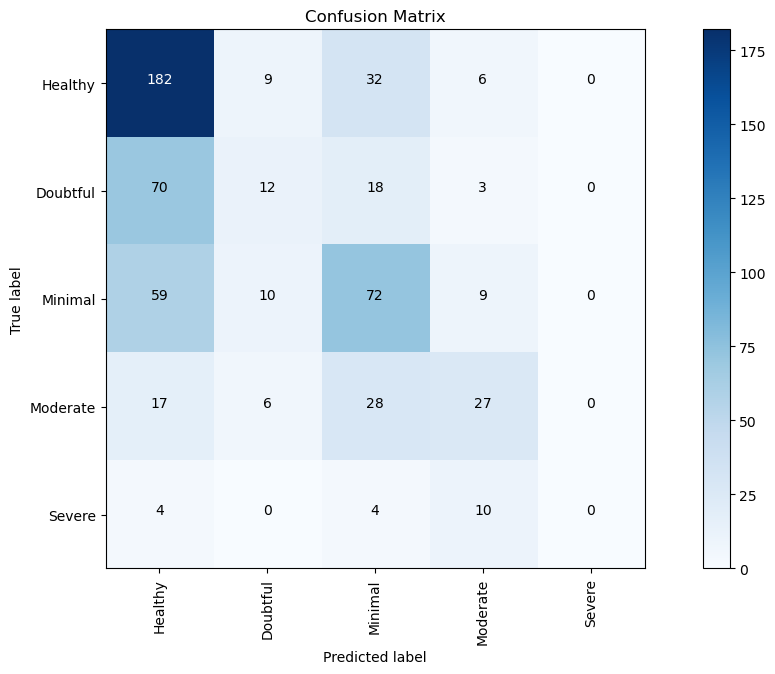

In [33]:
make_confusion_matrix(valid, prediction, list(labels.values()))

In [36]:
print("Model accuracy on test is: ", round(accuracy_score(valid, prediction),4))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(valid, prediction, average='micro'),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(valid, prediction, average='micro'),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(valid, prediction, average='micro'),3))
print('-'*50)

Model accuracy on test is:  0.5069
--------------------------------------------------
Model precision score on test is:  0.507
--------------------------------------------------
Model recall score on test is:  0.507
--------------------------------------------------
Model F1 score on test is:  0.507
--------------------------------------------------
